In [274]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor,ExtraTreesRegressor
from sklearn import metrics

In [85]:
df = pd.read_excel('Data_Train.xlsx')

In [86]:
df.shape

(10683, 11)

In [87]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [88]:
df.dropna(how='any',inplace=True)

In [89]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [90]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [91]:
df.drop(['Route'],axis=1,inplace=True)

In [92]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,4h 45m,1 stop,No info,13302


In [93]:
df.Airline.value_counts(),df.Source.value_counts(),df.Destination.value_counts()

(Jet Airways                          3849
 IndiGo                               2053
 Air India                            1751
 Multiple carriers                    1196
 SpiceJet                              818
 Vistara                               479
 Air Asia                              319
 GoAir                                 194
 Multiple carriers Premium economy      13
 Jet Airways Business                    6
 Vistara Premium economy                 3
 Trujet                                  1
 Name: Airline, dtype: int64,
 Delhi       4536
 Kolkata     2871
 Banglore    2197
 Mumbai       697
 Chennai      381
 Name: Source, dtype: int64,
 Cochin       4536
 Banglore     2871
 Delhi        1265
 New Delhi     932
 Hyderabad     697
 Kolkata       381
 Name: Destination, dtype: int64)

In [94]:
Airline = pd.get_dummies(df['Airline'])
Source = pd.get_dummies(df['Source'])
Destination = pd.get_dummies(df['Destination'])

In [95]:
df['Jounrney_date'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df['Jounrney_month'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month


In [96]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [97]:
df['Dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['Dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute

In [98]:
df.drop(['Dep_Time'],axis=1,inplace=True)

In [99]:
df['Arr_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['Arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute

In [100]:
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [101]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Jounrney_date,Jounrney_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [113]:
new= df['Duration'].str.split(" ",n=1,expand=True)

In [126]:
nw1= new[0].str.split("h",n=1,expand=True)
df['Duration_hr']=nw1[0]

In [127]:
nw2= new[1].str.split("m",n=1,expand=True)
df['Duration_minute']=nw2[0]

In [128]:
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Jounrney_date,Jounrney_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2 stops,No info,13882,9,6,9,25,4,25,19,None
3,IndiGo,Kolkata,Banglore,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [136]:
df.replace(to_replace=np.nan,value=0,inplace=True)

In [138]:
df.drop(['Duration'],axis=1,inplace=True)

In [139]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Jounrney_date,Jounrney_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,16,50,21,35,4,45


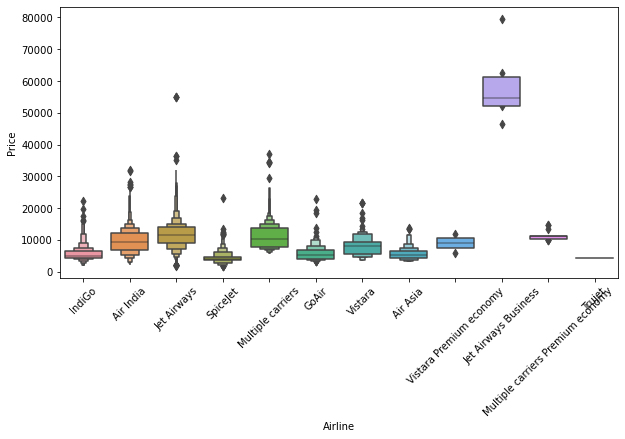

In [145]:
plt.figure(figsize=[10,5])

sns.boxenplot(x='Airline',y='Price',data=df)
plt.xticks(rotation=45)
plt.show()

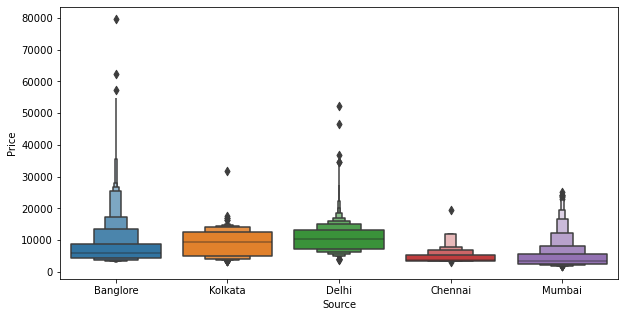

In [146]:
plt.figure(figsize=[10,5])
sns.boxenplot(x='Source',y='Price',data=df)

In [149]:
df=pd.concat([df,Airline,Source,Destination],axis=1)

In [151]:
df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [153]:
df.drop(['Additional_Info'],axis=1,inplace=True)

In [154]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [160]:
df['Total_Stops']=pd.DataFrame(le.fit_transform(df['Total_Stops']))

In [162]:
df.head()

,Total_Stops,Price,Jounrney_date,Jounrney_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hr,Duration_minute,...,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,4.0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,1.0,7662,1,5,5,50,13,15,7,25,...,0,0,1,0,1,0,0,0,0,0
2,1.0,13882,9,6,9,25,4,25,19,0,...,0,1,0,0,0,1,0,0,0,0
3,0.0,6218,12,5,18,5,23,30,5,25,...,0,0,1,0,1,0,0,0,0,0
4,0.0,13302,1,3,16,50,21,35,4,45,...,0,0,0,0,0,0,0,0,0,1


In [198]:
df.shape

(10681, 33)

In [199]:
df.columns

Index(['Total_Stops', 'Price', 'Jounrney_date', 'Jounrney_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hr', 'Duration_minute',
       'Air Asia', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Banglore', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

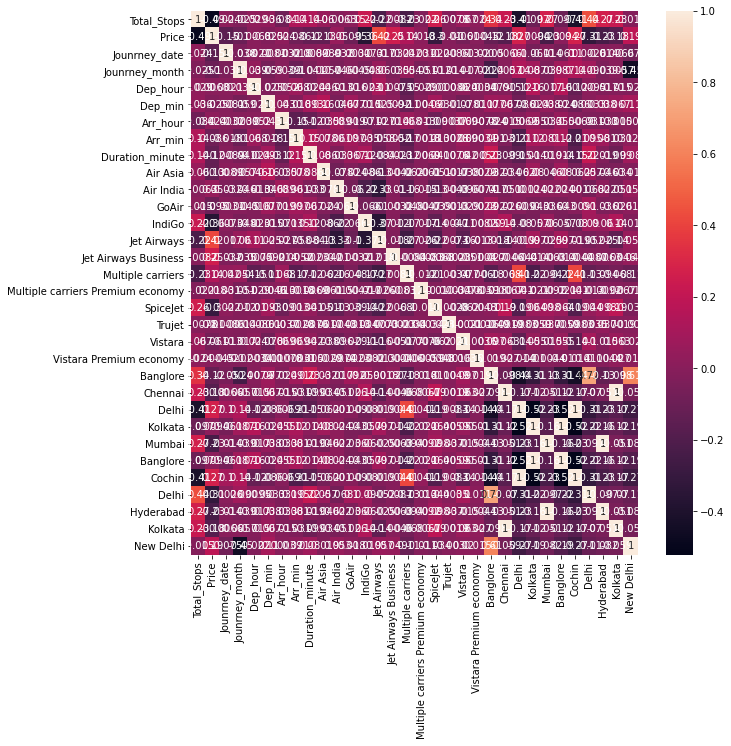

In [220]:
plt.figure(figsize=[10,10])

sns.heatmap(df.corr(),annot=True)

In [221]:
df.corr()

,Total_Stops,Price,Jounrney_date,Jounrney_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_minute,Air Asia,...,Chennai,Delhi,Kolkata,Mumbai,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
Total_Stops,1.000000,-0.488720,0.024249,-0.025076,0.029152,0.035632,-0.084465,0.140079,0.144195,0.059623,...,0.225357,-0.409211,-0.097243,0.266647,-0.097243,-0.409211,0.439562,0.266647,0.225357,-0.015267
Price,-0.488720,1.000000,-0.153749,-0.103659,0.006823,-0.024549,0.024200,-0.086126,-0.124876,-0.133043,...,-0.179216,0.270634,0.009391,-0.230746,0.009391,0.270634,-0.313404,-0.230746,-0.179216,0.189797
Jounrney_date,0.024249,-0.153749,1.000000,-0.038347,0.002149,-0.008090,-0.003204,-0.017540,-0.008940,0.008917,...,0.006601,0.100153,-0.060590,-0.014043,-0.060590,0.100153,0.002613,-0.014043,0.006601,-0.075271
Jounrney_month,-0.025076,-0.103659,-0.038347,1.000000,0.039138,-0.059313,-0.003946,-0.100614,-0.040844,0.005656,...,0.005655,0.139204,0.087193,-0.039346,0.087193,0.139204,0.090499,-0.039346,0.005655,-0.453682
Dep_hour,0.029152,0.006823,0.002149,0.039138,1.000000,-0.024683,0.005213,0.067889,-0.023744,0.045953,...,-0.014854,-0.118741,0.155450,-0.017303,0.155450,-0.118741,0.009454,-0.017303,-0.014854,-0.022151
Dep_min,0.035632,-0.024549,-0.008090,-0.059313,-0.024683,1.000000,0.043003,-0.017510,0.092531,0.158258,...,0.067148,-0.085728,-0.024149,0.037750,-0.024149,-0.085728,0.003256,0.037750,0.067148,0.107190
Arr_hour,-0.084465,0.024200,-0.003204,-0.003946,0.005213,0.043003,1.000000,-0.154325,-0.118282,-0.034980,...,-0.014781,-0.006881,0.054742,-0.033492,0.054742,-0.006881,-0.030839,-0.033492,-0.014781,0.000389
Arr_min,0.140079,-0.086126,-0.017540,-0.100614,0.067889,-0.017510,-0.154325,1.000000,0.151548,0.078253,...,-0.030504,-0.209835,0.118544,0.081183,0.118544,-0.209835,0.095232,0.081183,-0.030504,0.021254
Duration_minute,0.144195,-0.124876,-0.008940,-0.040844,-0.023744,0.092531,-0.118282,0.151548,1.000000,0.085807,...,-0.098824,-0.154054,0.013750,-0.018877,0.013750,-0.154054,0.218195,-0.018877,-0.098824,0.079859
Air Asia,0.059623,-0.133043,0.008917,0.005656,0.045953,0.158258,-0.034980,0.078253,0.085807,1.000000,...,-0.033746,-0.061696,0.079718,-0.046359,0.079718,-0.061696,0.056547,-0.046359,-0.033746,-0.019169


In [200]:
df.dropna(how='any',inplace=True)

In [201]:
X.shape,y.shape

((10681, 32), (10681, 1))

In [206]:
X=df.drop(['Price','Duration_hr', 'Duration_minute'],axis=1)
y=df[['Price']]

In [225]:
selec = ExtraTreesRegressor()
selec.fit(X,y)
print(selec.feature_importances_)

<ipython-input-225-6bf19a7d5ac5>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selec.fit(X,y)


[2.70897297e-01 1.47299082e-01 5.34372526e-02 4.39027889e-02
 3.52923909e-02 4.48082658e-02 3.02166151e-02 6.59934831e-03
 9.92597765e-03 3.53982829e-03 3.21585632e-02 1.18793653e-01
 6.70750653e-02 1.32412691e-02 7.29188929e-04 1.62134689e-02
 2.18098347e-04 4.42798123e-03 9.95511512e-05 5.52101318e-03
 5.13199115e-04 1.30975412e-02 6.15225998e-03 4.69448222e-03
 6.68531808e-03 1.80070395e-02 7.82490772e-03 4.71987895e-03
 5.21134009e-04 3.33875401e-02]


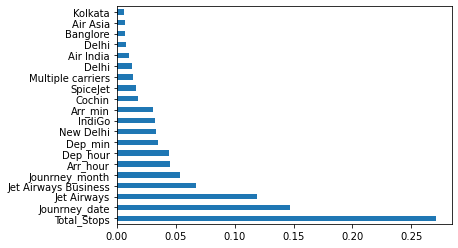

In [227]:
fea_imp = pd.Series(selec.feature_importances_,index=X.columns)
fea_imp.nlargest(20).plot(kind='barh')
plt.show()

In [207]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [211]:
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred= lr.predict(X_test)
r2_score(y_test,y_pred)

0.550092630011235

In [271]:
rnd=RandomForestRegressor(n_estimators=1000,max_depth=15)
rnd.fit(X_train,y_train)
y_pred=rnd.predict(X_test)
rnd.score(X_train,y_train),rnd.score(X_test,y_test)

<ipython-input-271-4d70ef2ddb4d>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rnd.fit(X_train,y_train)


(0.9363168879806177, 0.7835872018592462)

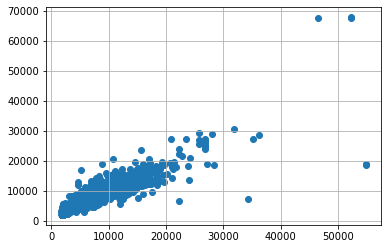

In [273]:
plt.scatter(y_test,y_pred)
plt.grid()
plt.show()

In [301]:
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
print('MSE',metrics.mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 1272.1418782058004
MSE 4881168.816442351
RMSE 2209.33673677019


In [278]:
r2_score(y_test,y_pred)

0.7835872018592462

## Hyperparameter Tuning

In [290]:
from sklearn.model_selection import RandomizedSearchCV

In [285]:
# no of tree in random forest
n_estimators= [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
#no of feature to consider
max_features=['auto','sqrt']

max_depth= [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10]


In [286]:
random= {'n_estimators':n_estimators,
        'max_features':max_features,
        'max_depth':max_depth,
        'min_samples_split':min_samples_split,
        'min_samples_leaf':min_samples_leaf}

In [292]:
rf_random = RandomizedSearchCV(estimator = rnd, param_distributions = random,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)


In [293]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.2s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.1s remaining:    0.0s
C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.0s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.7s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.8s
[CV] n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=900, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   5.4s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.1s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   7.8s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.3s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.9s
[CV] n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=15, total=   8.9s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   4.6s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   4.4s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   4.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   5.3s
[CV] n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=100, min_samples_leaf=5, max_features=auto, max_depth=15, total=   4.8s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   8.6s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   8.7s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   7.9s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   7.5s
[CV] n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=400, min_samples_split=5, min_samples_leaf=5, max_features=auto, max_depth=15, total=   7.2s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  11.7s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  12.0s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  11.6s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  11.9s
[CV] n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=5, min_samples_leaf=10, max_features=auto, max_depth=20, total=  11.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  12.4s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  11.8s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  12.0s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  12.1s
[CV] n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1000, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=  12.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.1s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.2s
[CV] n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=1100, min_samples_split=15, min_samples_leaf=10, max_features=sqrt, max_depth=5, total=   4.3s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=300, min_samples_split=15, min_samples_leaf=1, max_features=sqrt, max_depth=15, total=   2.0s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.7s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.9s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  14.4s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  13.6s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  14.1s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  14.2s
[CV] n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20 


C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  n_estimators=700, min_samples_split=15, min_samples_leaf=1, max_features=auto, max_depth=20, total=  13.8s


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  6.1min finished
C:\Users\Dwarika\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_depth=15,
                                                   n_estimators=1000),
                   n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [294]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [296]:
pred= rf_random.predict(X_test)

In [300]:
print('MAE',metrics.mean_absolute_error(y_test,pred))
print('MSE',metrics.mean_squared_error(y_test,pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,pred)))

MAE 1285.904624462968
MSE 4807937.511367333
RMSE 2192.700962595523


In [303]:
import pickle

In [304]:
file = open('flight.pkl','wb')
pickle.dump(rnd,file)

In [305]:
model = open('flight.pkl','rb')
forest = pickle.load(model)

In [306]:
y_predict = forest.predict(X_test)

In [307]:
r2_score(y_test,y_predict)

0.7835872018592462